<a href="https://colab.research.google.com/github/lalitha12-web/Linear-Regression-Assignment/blob/main/BoomBikesSharing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression - bike sharing company Project**








# **Problem Statement**


 A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.The company is finding it very difficult to sustain in the current market scenario.So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.



# **Bussiness goal**

BoomBikes want to understand the factors affecting the demand for these shared bikes in the American market.

The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

# **Steps for building a Model**

* **Step 1:** Reading, understanding and visualising data
* **Step 2:** Preparing the data for modeling(train-test split, rescaling)
* **Step 3:** Training the model
* **Step 4:** Residual analysis
* **Step 5:** Predictions and evaluation on the test set
* **Step 6:** Conclusion


#**Step 1: Reading, understanding and visualising data**
* import necessary libraries
* Load the data
* Analysing raw data
     * Find the shape of the data
     * Datatypes of the data
     * Stastical information abou the data
     * Detailed Information about the columns by Data Dictionary
     * Checking null values
     * Checking outliers
     * Drop unwanted variables
     * Convertion of data
* Visualising data


##**import necessary libraries**

In [ ]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',200)

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For scaling features to a given range
from sklearn.preprocessing import MinMaxScaler

# For Recursive Feature Elimination (RFE) to select features
from sklearn.feature_selection import RFE

# For creating a linear regression model
from sklearn.linear_model import LinearRegression

# For calculating Variance Inflation Factor (VIF) to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For statistical models and analysis
import statsmodels.api as sm

# For calculating the R-squared metric to evaluate model performance
from sklearn.metrics import r2_score

##**Load the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
filepath="/content/drive/MyDrive/IIITB-AIML/LinearRegression/day.csv"
bikes= pd.read_csv(filepath)


##**Analysing raw data**

In [ ]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#find the shape of the dataset
bikes.shape


(730, 16)

In [ ]:
#get the information about the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Infer: If we observer there is no null values in dataset, so its good to go**

In [ ]:
#find tha stats information about the bikes data
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# Checl column names once
bikes.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# removing the unwanted columns
# if we observe columns and values here I feel that instant and dteday is unwanted columns as instant is identifier and already we have seperate columns of month and year
# Casual and registered columns are related to target variable, so we not include in the prediction

#Lets drop instant and dteday
bikes.drop(['instant'],axis=1,inplace=True)
bikes.drop(['dteday'],axis=1,inplace=True)
bikes.drop(['casual','registered'],axis=1,inplace=True)

In [ ]:
#lets check shape
bikes.shape


(730, 12)

In [ ]:
# Now we need to convert season,month,weekday,weatherlist to categorical data
bikes.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikes.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikes.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

bikes.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
# check the outliers
bike_numvars=['cnt','temp','atemp','hum','windspeed']
for col in bike_numvars:
    print("barplot of",col)
    sns.barplot(x=bikes[col],y='cnt',data=bikes)
    plt.show()

**Infer:If we observe no Outliers in dataset. So outlier treatment is not required.**

##**visualizing data**

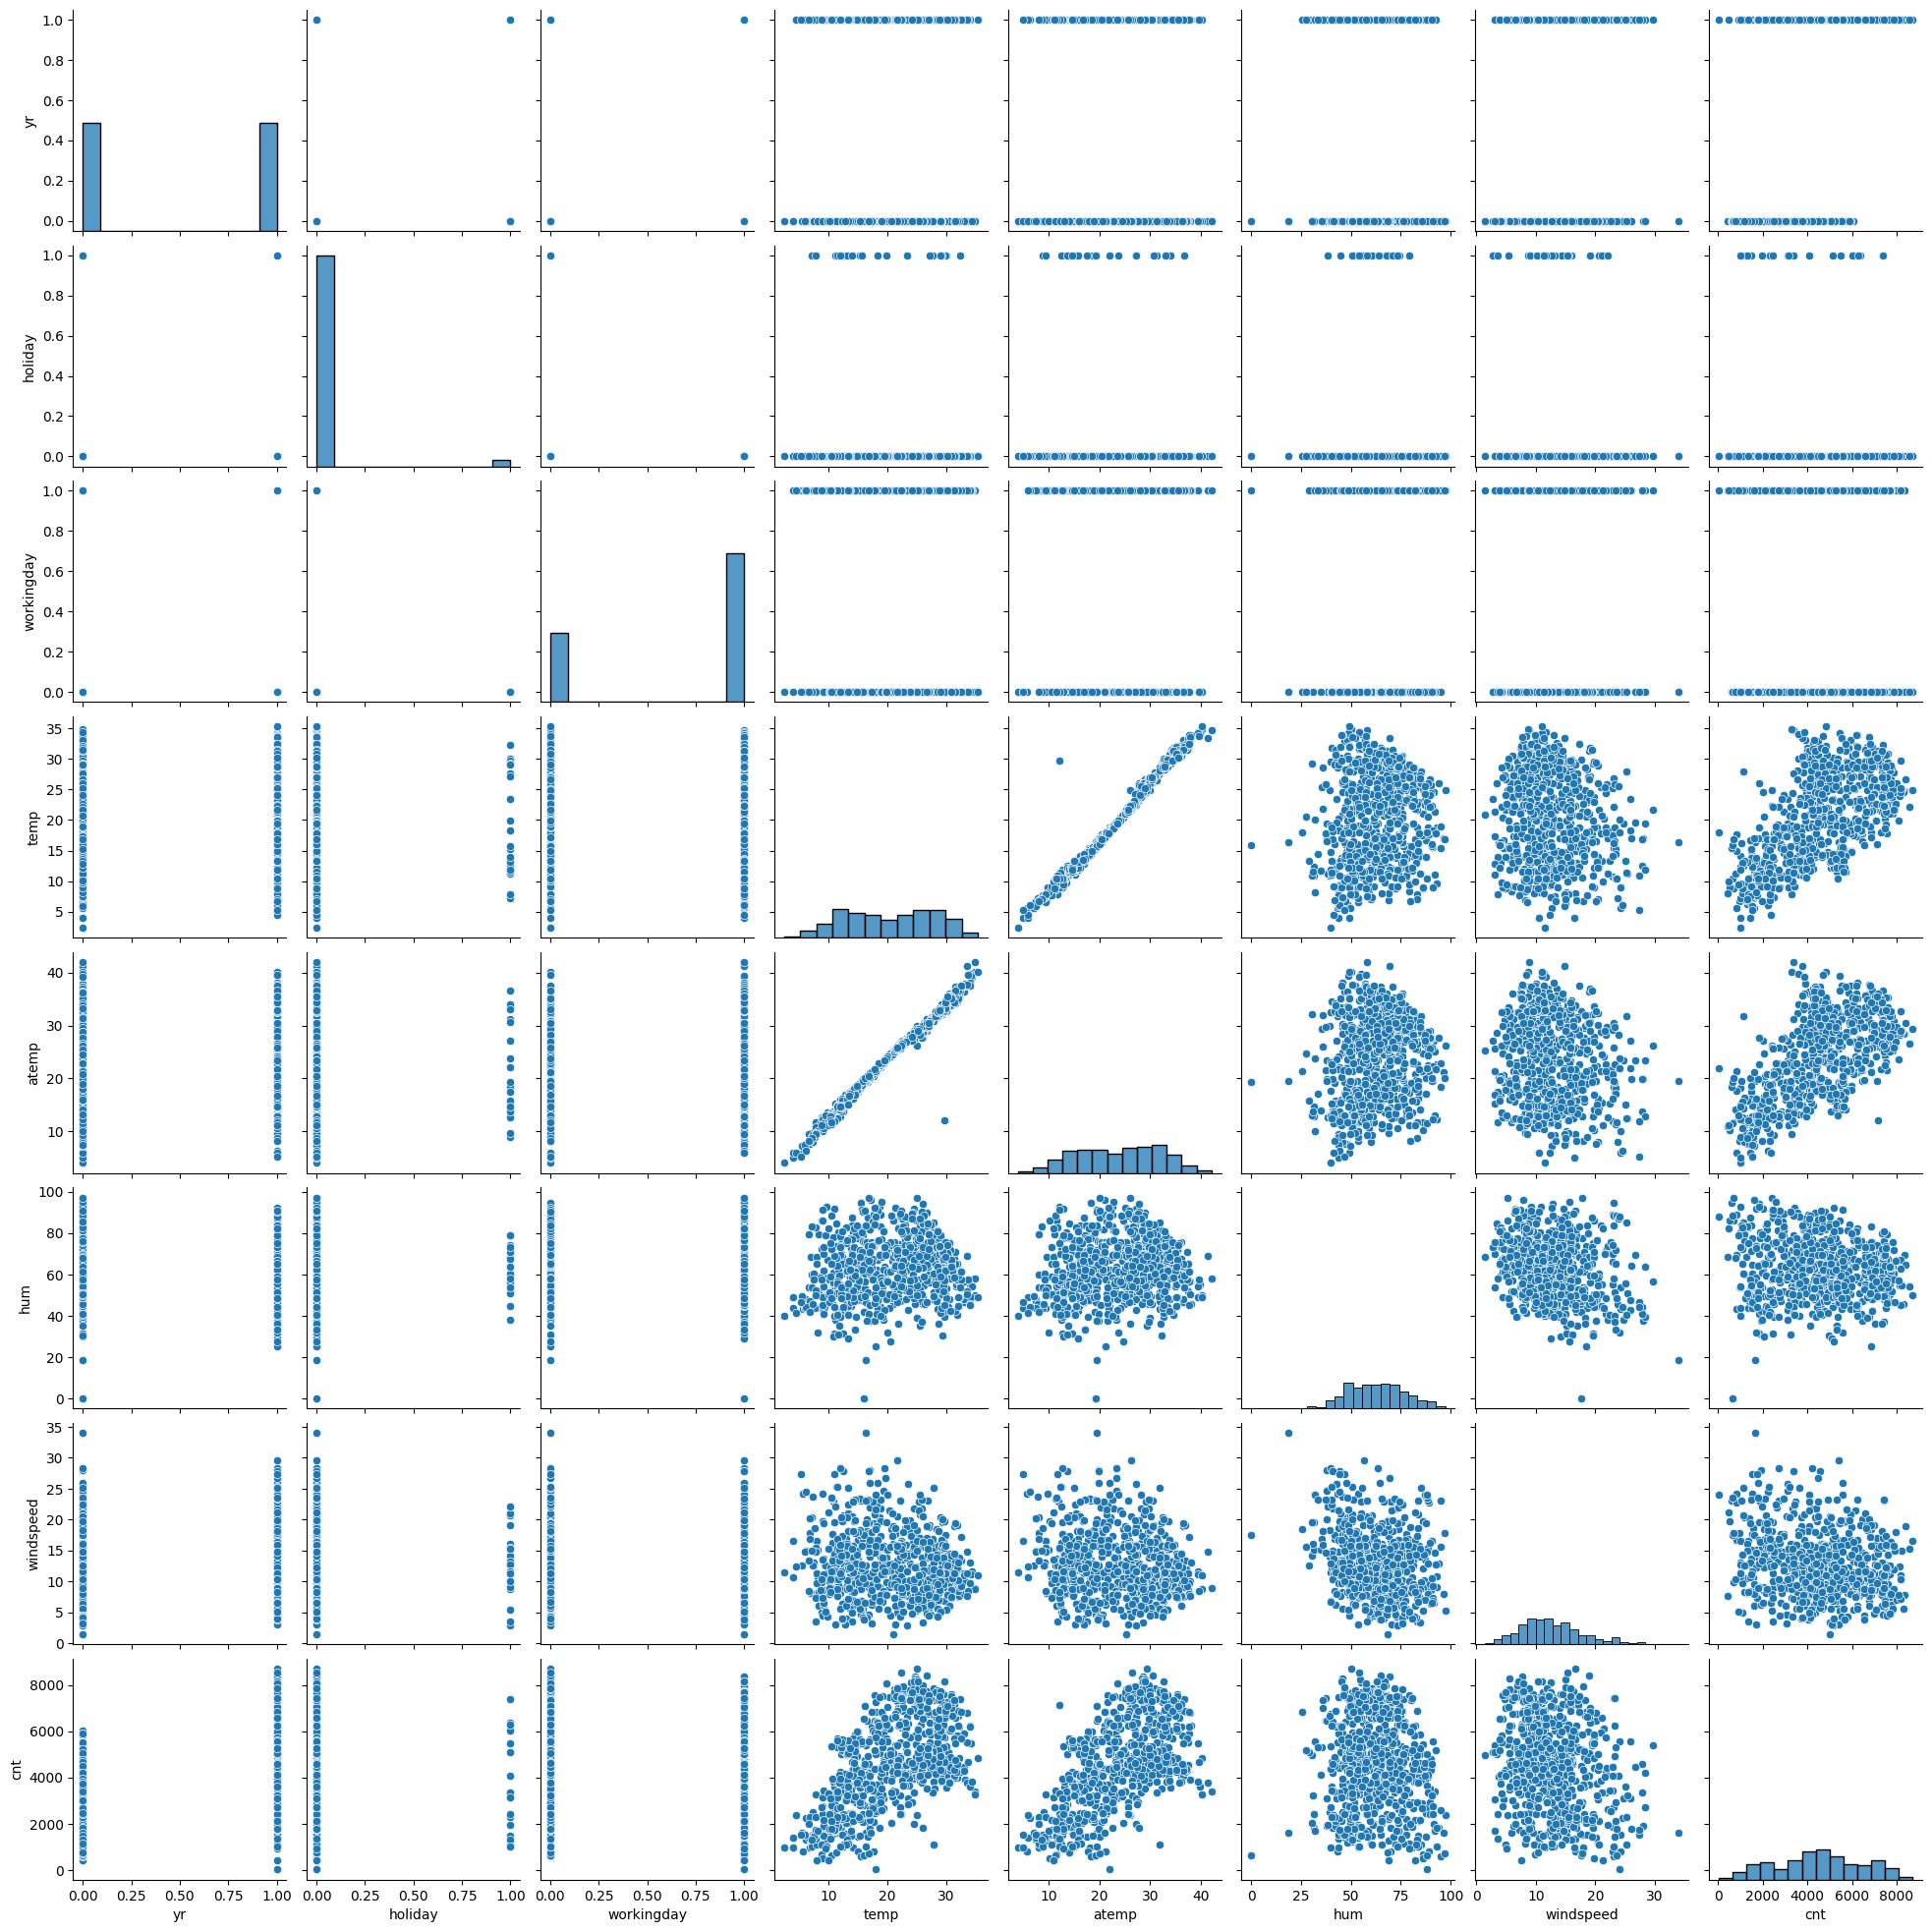

In [ ]:
#visualizing data
sns.pairplot(bikes)

In [ ]:
bikes.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

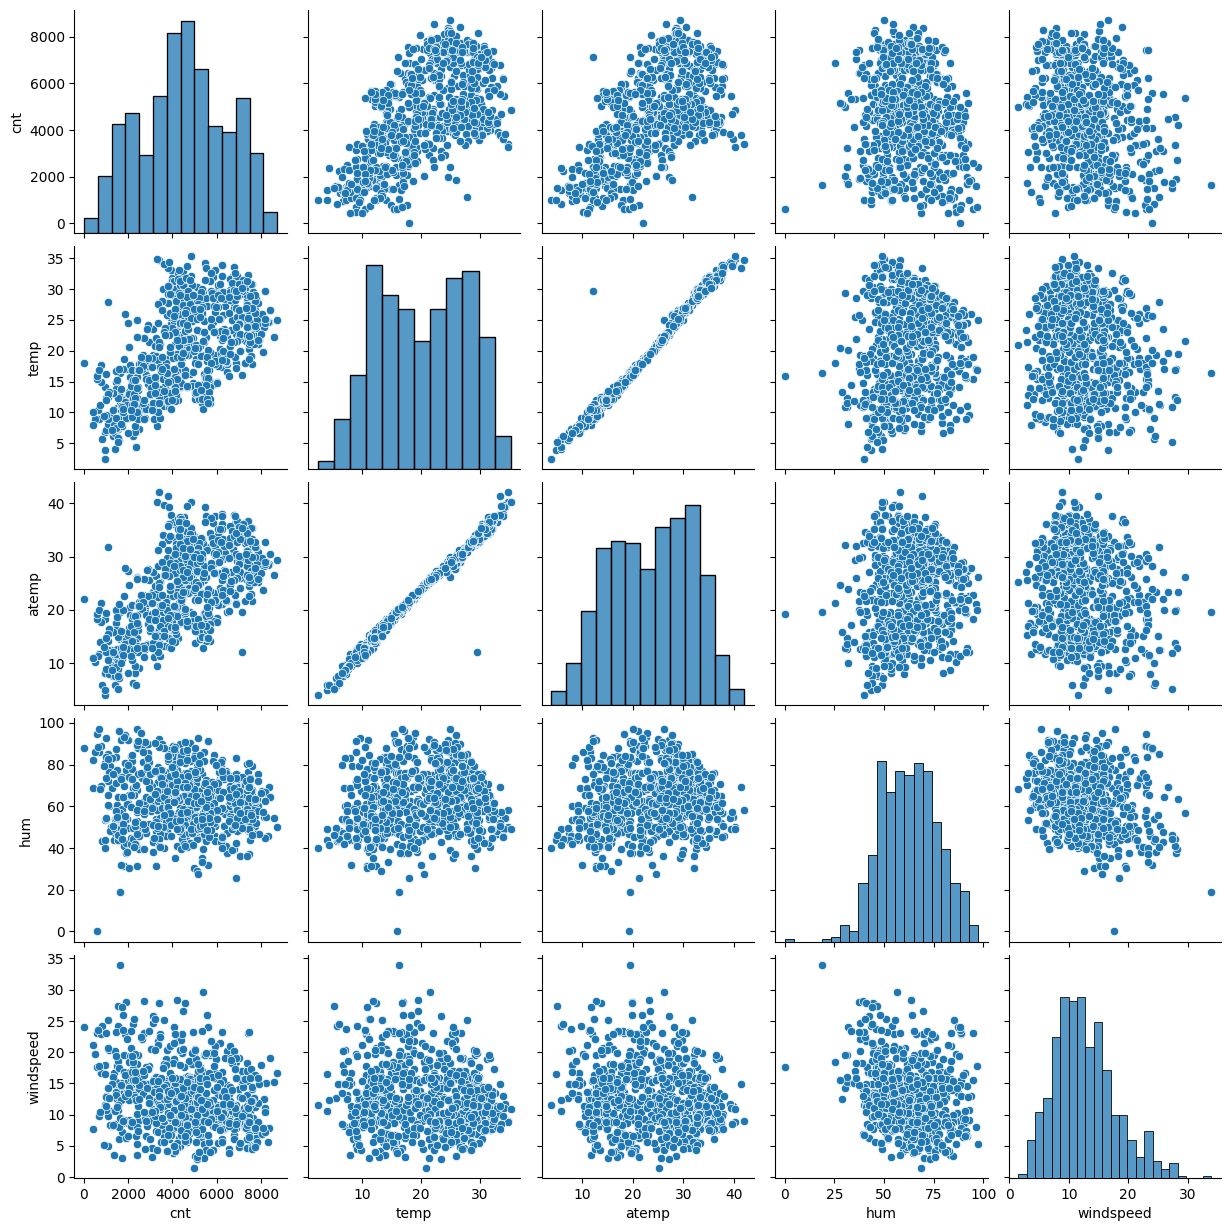

In [ ]:
#Plots on numerical columns

sns.pairplot(data=bikes,vars=bike_numvars)

**Infer: temp and atemp variables have highly linearly corelated with the target variables 'cnt'**

barplot of season


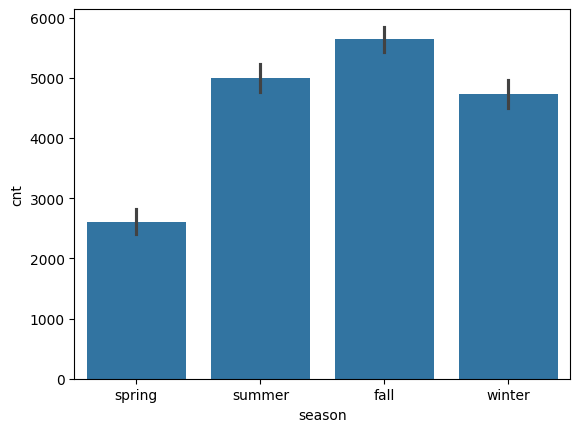

barplot of yr


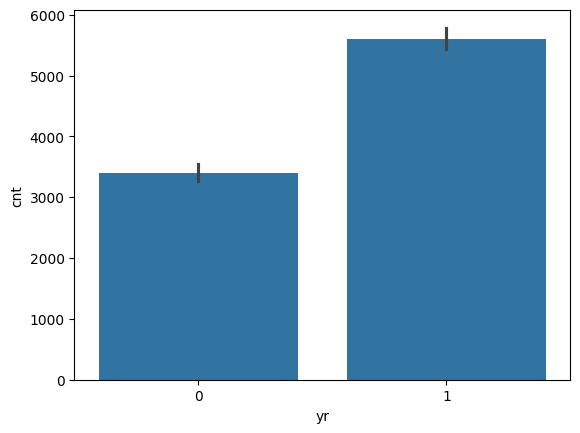

barplot of mnth


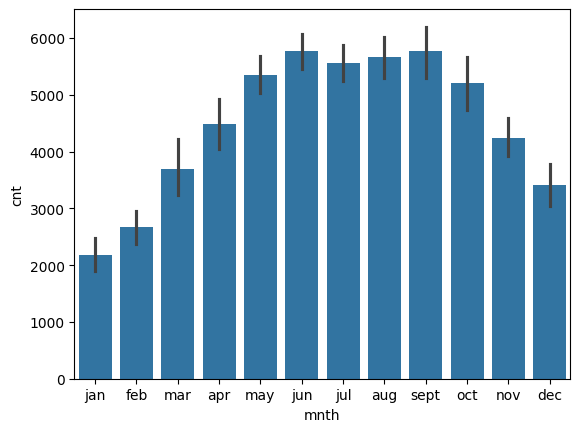

barplot of holiday


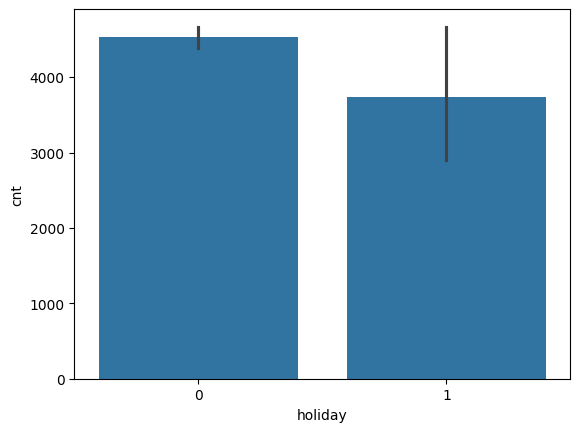

barplot of weekday


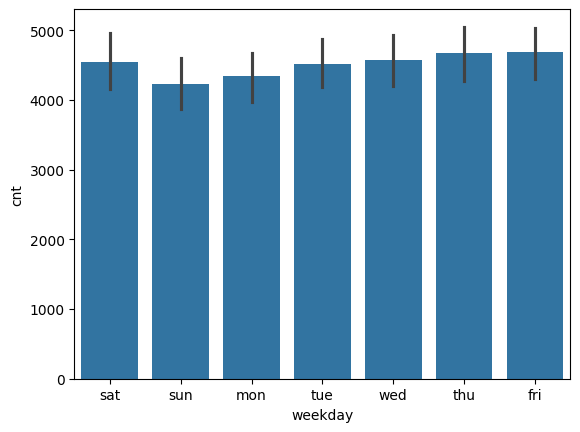

barplot of workingday


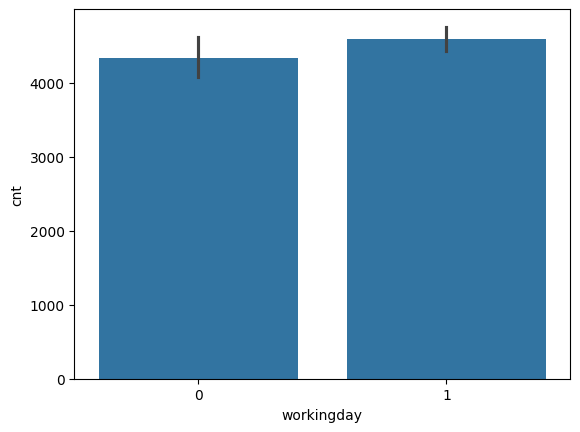

barplot of weathersit


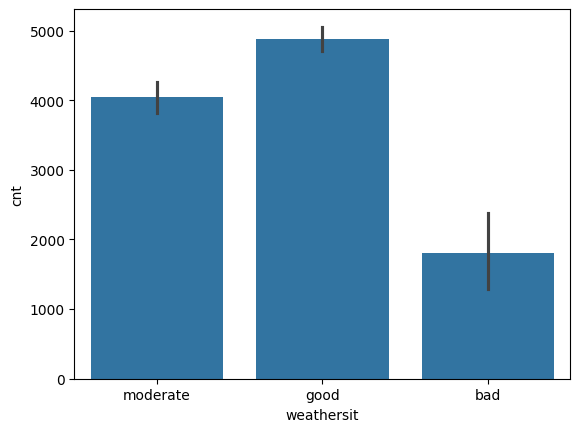

In [ ]:
bike_catvars=['season','yr','mnth','holiday','weekday','workingday','weathersit']
#Plot bar plots for Categorical data
for col in bike_catvars:
    print("barplot of",col)
    sns.barplot(x=bikes[col],y='cnt',data=bikes)
    plt.show()

**Infer:**
*	**Most of the bookings have been done during the months of May, June, July, August, September, and October.**
*	**Fall season seems to have attracted more bookings. In each season, the booking count has increased drastically from 2018 to 2019.**
*	**Clear weather attracted more bookings, which seems obvious.**
*	**Thursday, Friday, Saturday, and Sunday have more bookings compared to the start of the week.**
*	**When it’s not a holiday, bookings seem to be fewer, which is reasonable as on holidays, people may want to spend time at home and enjoy with family.**
*	**Bookings seem to be almost equal on working days and non-working days.**
*	**2019 attracted more bookings compared to the previous year, which shows good progress in terms of business.**


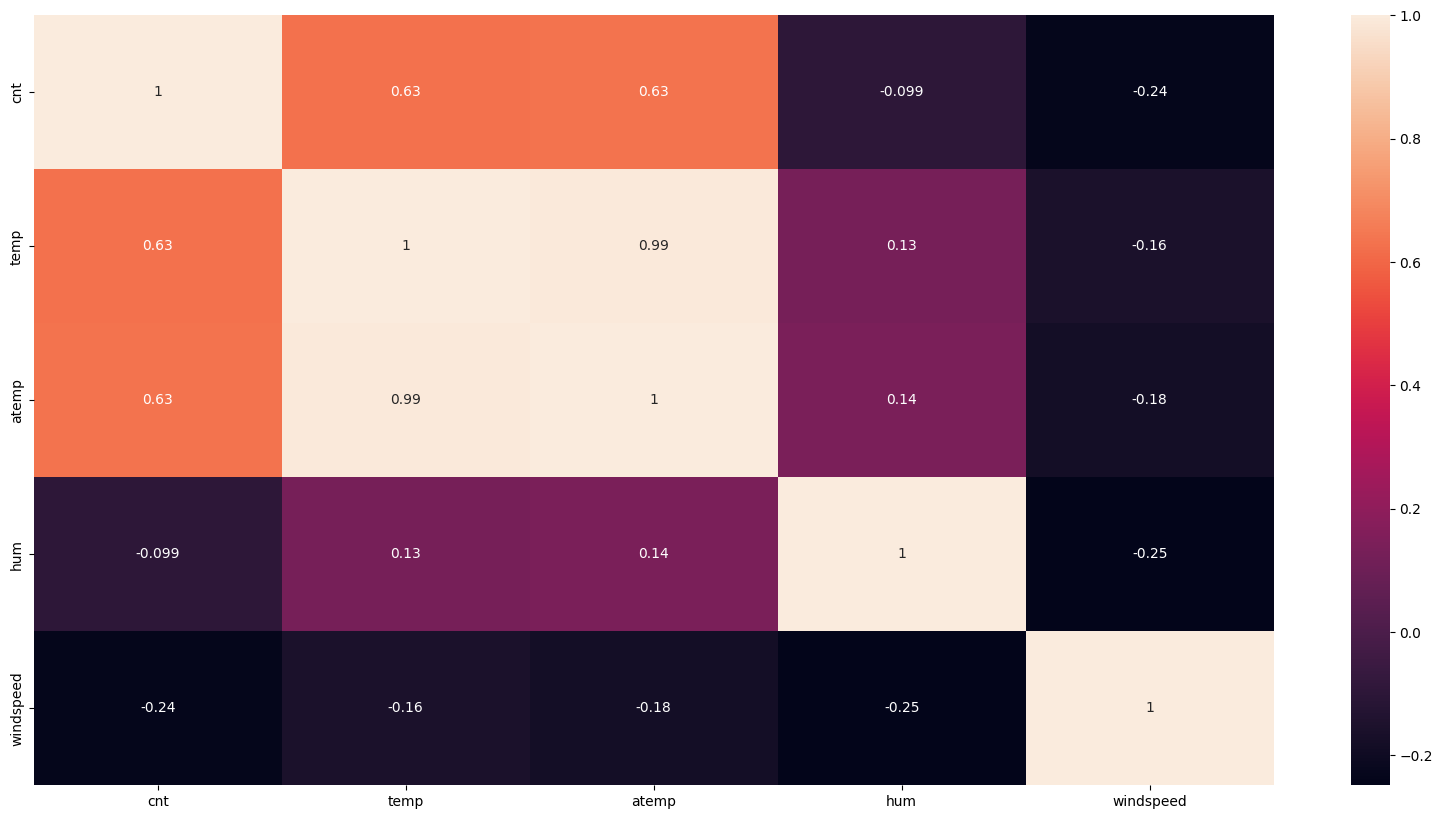

In [ ]:
#Draw the heatmap for find the corelation between the variables
plt.figure(figsize=(20,10))
sns.heatmap(bikes[bike_numvars].corr(),annot=True)
plt.show()

 # **Step 2: Preparing the data for modeling(train-test split, rescaling)**
* Encoding
    * converting binary vars to 1/0
    * Other categorical vars to dummy vars
* Feature Scaling

## **Create dummy variables for "season","mnth",weathersit","weekday"**
Creating dummy variables (also known as one-hot encoding) is essential for handling categorical variables in many statistical and machine learning models because these models typically require numerical input.

In [ ]:
bikes = pd.get_dummies(data=bikes,columns=["season","mnth","weekday"],drop_first=True)
bikes = pd.get_dummies(data=bikes,columns=["weathersit"],drop_first=True)

In [ ]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [ ]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,True,False


In [ ]:
# Convert boolean dummy variables to integers
for col in bikes.columns:
    if bikes[col].dtype == 'bool':  # Check if the column is of boolean type
        bikes[col] = bikes[col].astype(int)

In [ ]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


##Split data into trainset and test set

In [ ]:
#Check the shape once
bikes.shape

(730, 30)

In [ ]:
#lets split train and test sets
bikes_train,bikes_test= train_test_split(bikes, train_size=0.7,random_state=100)


(220, 30)

In [ ]:
#check the shape of test data
bikes_test.shape

(220, 30)

In [ ]:
#check the shape of train data
bikes_train.shape

(510, 30)

## **Feature scaling**

Feature scaling is a technique used to standardize the independent features in data to a fixed range. Here we are using **Normalized Scaling**.

In [ ]:
#Intialize scaler
scaler=MinMaxScaler()


In [ ]:
#before scaling check the data
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Numerical variables
numvars=['temp','atemp','hum','windspeed','cnt']

#Fit on data
bikes_train[numvars]=scaler.fit_transform(bikes_train[numvars])

#Check the data after testing
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


#**Step 3: Train the Modle**

In [ ]:
# Lets check the statistics
bikes_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

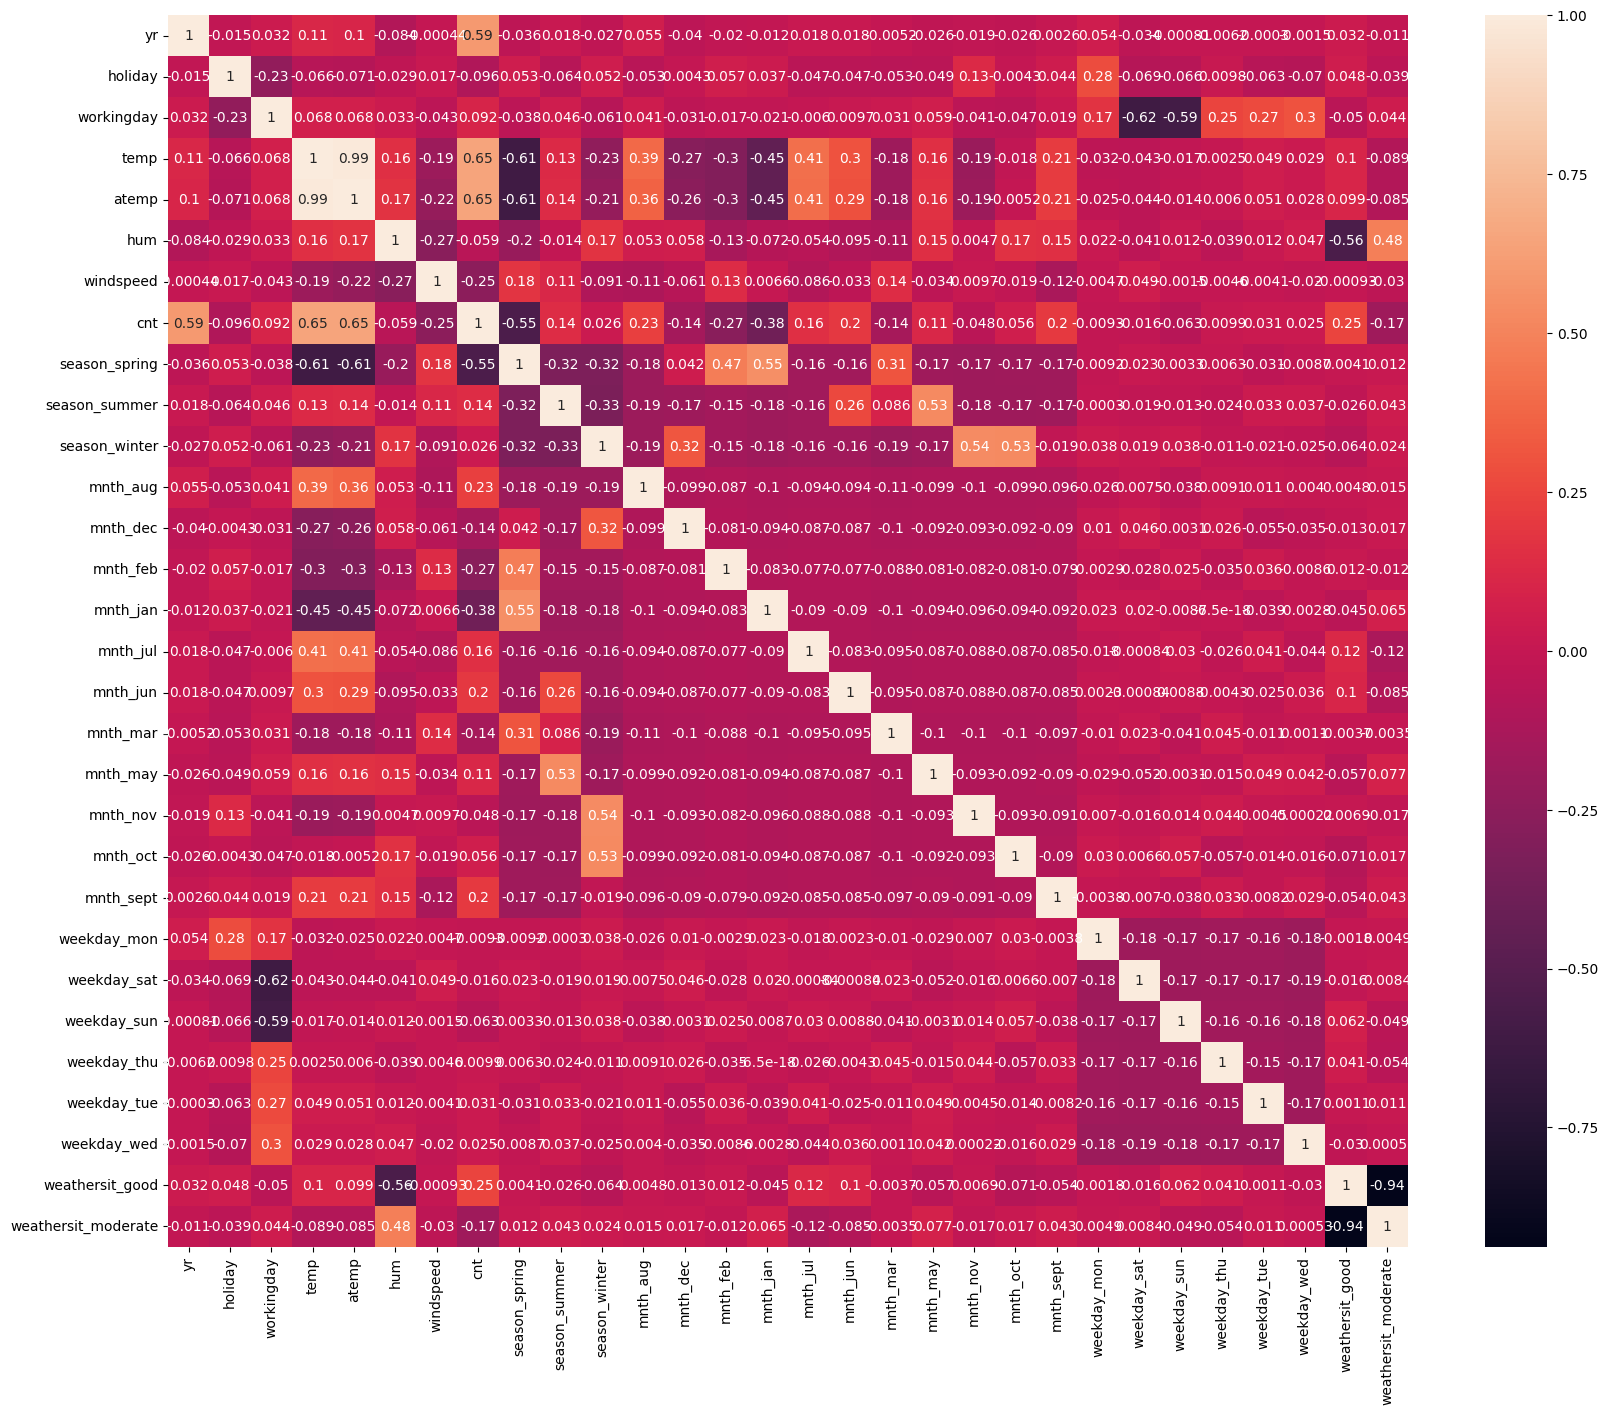

In [ ]:
#Lets check the heatmap to find the correaltion between the numerical variables
plt.figure(figsize=(20,16))
sns.heatmap(bikes_train.corr(),annot=True)

In [ ]:
# Lets take X_train, y_train
y_train=bikes_train.pop('cnt')
X_train=bikes_train

In [ ]:
#lets find first 5 rows of X_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


**Adding all variables to the Model**

In [ ]:
  # Check all the cloumns
  bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

##**Recursive feature elimination(RFE):**
Recursive Feature Elimination (RFE) is a feature selection technique used in machine learning to identify the most important features in a dataset. The goal is to improve the performance of the model by selecting a subset of relevant features and eliminating less important ones.

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [ ]:
# Running RFE with the output number of the variable equal to 15
# Create a linear regression model instance
lm = LinearRegression()

# Fit the linear regression model on the training data
lm.fit(X_train, y_train)

# Initialize RFE with the linear regression model and set the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=16)

# Fit RFE on the training data to perform recursive feature elimination
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Create a list of tuples containing each feature, whether it was selected, and its ranking
# X_train.columns provides the names of the features
# rfe.support_ is a boolean array indicating which features were selected
# rfe.ranking_ is an array with the ranking of each feature (1 indicates selected features)
feature_ranking = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 11),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [87]:
#Check rfe support columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [ ]:
#Check rfe not support columns
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [ ]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe


,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_jul,mnth_nov,mnth_sept,weekday_sat,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,1,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,1,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,0,1,0,1
79,0,0,1,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,0,1


##**Model 1**

In [ ]:
# build model 1
X_train_sm = sm.add_constant(X_train_rfe)

#create Model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#lr_params
lr_model.params

const                  0.010035
yr                     0.230585
holiday               -0.053894
workingday             0.043477
temp                   0.502767
hum                   -0.157942
windspeed             -0.184651
season_spring         -0.055119
season_summer          0.048499
season_winter          0.098524
mnth_jan              -0.035256
mnth_jul              -0.053190
mnth_nov              -0.023387
mnth_sept              0.078895
weekday_sat            0.053223
weathersit_good        0.248607
weathersit_moderate    0.192108
dtype: float64

P-values are a statistical measure used to evaluate the significance of results in hypothesis testing.
* P-value < 0.001: Highly significant. Strong evidence against the null hypothesis.
* P-value < 0.01: Very significant. Strong evidence against the null hypothesis.
* P-value < 0.05: Significant. Moderate evidence against the null hypothesis.
* P-value < 0.10: Marginally significant. Some evidence against the null hypothesis, but not strong enough to be conclusive.

In [ ]:
#lets find the P-value and other statistical values
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.30e-190
Time:                        12:42:56   Log-Likelihood:                 520.61
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     493   BIC:                            -935.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0100    

**Variance Inflation Factor (VIF)** is a measure used to detect multicollinearity in a set of multiple regression variables. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, leading to unreliable and unstable estimates of regression coefficients.

* VIF = 1: No correlation between the predictor and other predictors.
* 1< VIF < 5: Moderate correlation but not severe enough to warrant concern.
* VIF > 5: High correlation, suggesting potential multicollinearity issues.
* VIF > 10: Very high correlation, indicating severe multicollinearity and suggesting the need

In [ ]:
#Lets find the VIF value
#Create the dataframe that will contain the names of all the features variables and their respect VIF's

# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
#Lets check new VIF, and stats
calculateVIF(X_train_rfe)

,Features,VIF
4,hum,25.64
3,temp,23.19
14,weathersit_good,15.02
15,weathersit_moderate,9.15
6,season_spring,5.78
2,workingday,5.43
5,windspeed,4.72
8,season_winter,4.42
7,season_summer,3.24
0,yr,2.10


## **Model 2**

Now Lets compare VIF and P-values,
to build good model first we need to remove the High P-value, High VIF value a



In [ ]:
#lets drop the variable which has highest p value
X_train_new = X_train_rfe.drop(["mnth_jan"], axis = 1)


In [ ]:
#Lets check new VIF, and stats
calculateVIF(X_train_new)

,Features,VIF
4,hum,25.03
3,temp,21.76
13,weathersit_good,14.65
14,weathersit_moderate,8.99
6,season_spring,5.63
2,workingday,5.42
5,windspeed,4.70
8,season_winter,4.34
7,season_summer,3.22
0,yr,2.09


In [ ]:
# build model
X_train_sm = sm.add_constant(X_train_new)

#create Model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#lr_summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.29e-190
Time:                        12:42:56   Log-Likelihood:                 518.48
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     494   BIC:                            -937.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0003    

##**Model 3**

In [ ]:
#lets drop the variable which has highest p value
X_train_new = X_train_new.drop(["mnth_nov"], axis = 1)

In [ ]:
#Lets check new VIF, and stats
calculateVIF(X_train_new)

,Features,VIF
4,hum,25.02
3,temp,21.44
12,weathersit_good,14.44
13,weathersit_moderate,8.92
6,season_spring,5.53
2,workingday,5.41
5,windspeed,4.66
8,season_winter,4.03
7,season_summer,3.19
0,yr,2.09


In [ ]:
# build model with all variables
X_train_sm = sm.add_constant(X_train_new)

#create Model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#lr_summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.11e-191
Time:                        12:42:57   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0048    

## **Model 4**

In [ ]:
# #lets drop the variable which has highest p value
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [ ]:
# #Lets check new VIF, and stats
calculateVIF(X_train_new)

,Features,VIF
11,weathersit_good,14.42
3,temp,13.42
12,weathersit_moderate,8.21
2,workingday,5.33
4,windspeed,4.63
5,season_spring,4.16
6,season_summer,2.78
7,season_winter,2.73
0,yr,2.07
10,weekday_sat,1.99


In [ ]:
# build model with all variables
X_train_sm = sm.add_constant(X_train_new)

#create Model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#lr_summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.28e-188
Time:                        12:42:57   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1320    

## **Model 5**

In [ ]:
#lets drop the variable which has highest p value
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [ ]:
#Lets check new VIF, and stats
calculateVIF(X_train_new)

,Features,VIF
10,weathersit_good,14.28
2,temp,13.36
11,weathersit_moderate,8.15
1,workingday,4.72
3,windspeed,4.63
4,season_spring,4.12
5,season_summer,2.78
6,season_winter,2.70
0,yr,2.07
9,weekday_sat,1.84


In [ ]:
# build model with all variables
X_train_sm = sm.add_constant(X_train_new)

#create Model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#lr_summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          7.12e-189
Time:                        12:42:57   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1391    

## **Model 6**

In [ ]:
# #lets drop the variable which has highest p value
X_train_new = X_train_new.drop(["mnth_jul"], axis = 1)

In [ ]:
# #Lets check new VIF, and stats
calculateVIF(X_train_new)

,Features,VIF
9,weathersit_good,14.23
2,temp,12.42
10,weathersit_moderate,8.14
1,workingday,4.72
3,windspeed,4.62
4,season_spring,3.98
6,season_winter,2.51
5,season_summer,2.41
0,yr,2.07
8,weekday_sat,1.84


In [ ]:
# build model
X_train_sm = sm.add_constant(X_train_new)

#create Model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#lr_summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.42e-188
Time:                        12:42:57   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1487    

## **Model 7**

In [ ]:
# #lets drop the variable which has highest p value
X_train_new = X_train_new.drop(["weathersit_good"], axis = 1)

In [ ]:
# #Lets check new VIF, and stats
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.47
1,workingday,4.63
3,windspeed,4.58
4,season_spring,2.29
0,yr,2.06
5,season_summer,2.00
8,weekday_sat,1.82
6,season_winter,1.74
9,weathersit_moderate,1.54
7,mnth_sept,1.22


In [ ]:
# build model with all variables
X_train_sm = sm.add_constant(X_train_new)

#create Model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#lr_summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.59e-163
Time:                        12:42:58   Log-Likelihood:                 439.93
No. Observations:                 510   AIC:                            -857.9
Df Residuals:                     499   BIC:                            -811.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1348    

## **Model 8**

In [ ]:
#lets drop the variable which has highest p value
X_train_new = X_train_new.drop(["season_spring"], axis = 1)

In [ ]:
# #Lets check new VIF, and stats
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.02
3,windspeed,3.40
0,yr,2.01
7,weekday_sat,1.68
4,season_summer,1.57
8,weathersit_moderate,1.50
5,season_winter,1.38
6,mnth_sept,1.20


In [ ]:
# build model with all variables
X_train_sm = sm.add_constant(X_train_new)

#create Model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#lr_summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.38e-163
Time:                        12:42:58   Log-Likelihood:                 437.81
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     500   BIC:                            -813.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0786    

**The model is suitable because it has low VIF values, indicating minimal multicollinearity, significant p-values for its predictors, and a high R² value of 79.1%, showing it explains a large portion of the variance in the dependent variable.**

#**Step 4: Residual analysis**

Residuals are the differences between the observed and predicted values of the dependent variable in a regression model. Residual analysis involves examining these differences to assess how well the model fits the data

---



<Axes: ylabel='Density'>

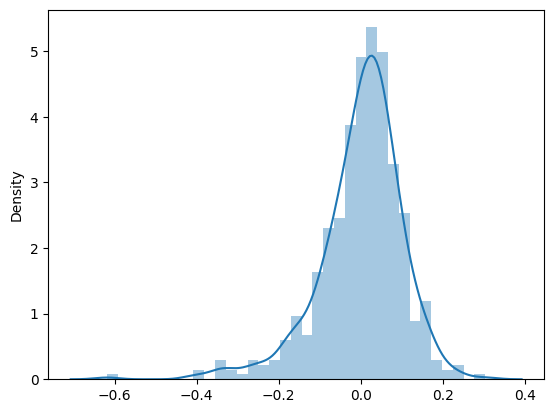

In [ ]:
y_train_pred=lr_model.predict(X_train_sm)
res=y_train - y_train_pred
sns.distplot(res)

This is  good regression model will have residuals that are randomly scattered around zero with no obvious patterns, normally distributed, with constant variance (homoscedasticity), and no apparent relationships with the independent variables.

#**Step 5: Predictions and evaluation on the test set**

In [ ]:
#Numerical variables
numvars=['temp','atemp','hum','windspeed','cnt']

#Fit on data
bikes_test[numvars]=scaler.transform(bikes_test[numvars])

#Check the data after testing
bikes_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
#lets check the stats of test data
bikes_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Define y_test and X_test values
y_test=bikes_test.pop('cnt')
X_test=bikes_test

In [ ]:
# Creating X_train dataframe with RFE selected variables
X_test_rfe = X_test[col]
X_test_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_jul,mnth_nov,mnth_sept,weekday_sat,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,1,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,1,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.756118,0.283397,0,0,1,0,0,0,0,0,1,0
127,0,0,0,0.584649,0.650923,0.069510,0,1,0,0,0,0,0,0,1,0
640,1,0,1,0.745598,0.817947,0.052115,0,0,1,0,0,0,0,0,0,1
72,0,0,1,0.331557,0.512107,0.203418,1,0,0,0,0,0,0,0,1,0


In [ ]:
#drop the columns which we droped during building model on train data
X_test_rfe=X_test_rfe.drop(['mnth_jan','mnth_nov','hum','holiday','mnth_jul','weathersit_good','season_spring'],axis=1)
X_test_rfe.head()


,yr,workingday,temp,windspeed,season_summer,season_winter,mnth_sept,weekday_sat,weathersit_moderate
184,0,0,0.831783,0.084219,0,0,0,0,1
535,1,1,0.901354,0.153728,1,0,0,0,0
299,0,1,0.511964,0.334206,0,1,0,0,1
221,0,1,0.881625,0.339570,0,0,0,0,0
152,0,1,0.817246,0.537414,1,0,0,0,0


In [ ]:
#add a constant
X_test_sm=sm.add_constant(X_test_rfe)
X_test_sm.head()


,const,yr,workingday,temp,windspeed,season_summer,season_winter,mnth_sept,weekday_sat,weathersit_moderate
184,1.0,0,0,0.831783,0.084219,0,0,0,0,1
535,1.0,1,1,0.901354,0.153728,1,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,1,0,0,1
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,1,0,0,0,0


In [ ]:
#predict
y_test_pred=lr_model.predict(X_test_sm)


In [ ]:
#Evaluate
# Calculate R-squared score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7692476895188507

# **Step 6:Conclusion**

**Based on the R^2 values of 79.1% for the train data and 76.9% for the test data, we can draw the following conclusions:**

**Train Data R^2 (79.1%):**

The model explains approximately 79.1% of the variance in the train data.
This high R^2 value indicates that the model fits the train data well and has strong explanatory power.

**Test Data R^2 (76.9%):**

The model explains approximately 76.9% of the variance in the test data.
The slightly lower R^2 value compared to the train data suggests that the model performs slightly less well on the test data, but it still has good explanatory power.

**Comparison:**

* The R^2 values for both train and test data are relatively high, indicating that the model generalizes well and is not overfitting.
* The train and test R^2 values are close to each other, suggesting that the model does not suffer from significant overfitting or underfitting issues.

**In summary**, the model performs well on both train and test data, with R^2 values of 79.1% and 76.9% respectively. This indicates that the model captures a significant amount of the variability in the data and can make reasonably accurate predictions on new, unseen data.





##**Significant Variables for Predicting Bike Demand:**

The variables that significantly predict the demand for shared bikes are:
* Temperature (temp)
* Working day (workingday)
* Wind speed (windspeed)
* Year (yr)
* Saturday (weekday_sat)
* Moderate weather conditions (weathersit_moderate)
* Summer season (season_summer)
* Winter season (season_winter)
* September month (mnth_sept)

These variables have low p-values, indicating they are statistically important for predicting bike demand.

In summary, these variables—temperature, working day, wind speed, year, day of the week, weather conditions, and seasonal and monthly variations—strongly affect bike demand.